# HLT Assignment

Defining variables.

In [455]:
#client id
ci = "z2vX4Rfmz20fww" 
#client secret
cs = "1nUwnreG-n8yWQFjQkWGp7RqnJLsiw" 
#user agent name
ua = "mandarraut1997" 
#the name of the subreddit
sub = "games"
#upvoted post
upvoted_post_name = ""

Creating corpus for subreddits.

In [456]:
import praw

reddit = praw.Reddit(
    client_id=ci,
    client_secret=cs,
    user_agent=ua
)

#dictionary to get the most upvoted subreddit and post id
upvote = {}
post_id = {}

with open(sub+".txt", "w", encoding='utf-8') as f:
    
    #getting top 10 posts for the day
    f.write("####Top 10 posts of the day####\n")
    for post in reddit.subreddit(sub).top(time_filter="day",limit=10):
        #this line collects the post titles
        f.write(post.title+": "+str(post.upvote_ratio)+"\n")
        upvote[post.title]=post.upvote_ratio
        post_id[post.title]=post
    
    #getting top 10 posts for the week
    f.write("\n####Top 10 posts of the week####\n")
    for post in reddit.subreddit(sub).top(time_filter="week",limit=10): 
        #this line collects the post titles
        f.write(post.title+": "+str(post.upvote_ratio)+"\n")
        upvote[post.title]=post.upvote_ratio
        post_id[post.title]=post
    
    #getting top 10 posts for the month
    f.write("\n####Top 10 posts of the month####\n")
    for post in reddit.subreddit(sub).top(time_filter="month",limit=10): 
        #this line collects the post titles
        f.write(post.title+": "+str(post.upvote_ratio)+"\n")
        upvote[post.title]=post.upvote_ratio
        post_id[post.title]=post
    
    #getting top 10 posts for the year
    f.write("\n####Top 10 posts of the year####\n")
    for post in reddit.subreddit(sub).top(time_filter="year",limit=10): 
        #this line collects the post titles
        f.write(post.title+": "+str(post.upvote_ratio)+"\n")
        upvote[post.title]=post.upvote_ratio
        post_id[post.title]=post
    
#calculating most upvoted post
upvoted_post_value = max(upvote.values())
upvoted_post_name = max(upvote, key=upvote.get)

#to get the post id for upvoted post
for id in post_id:
    if id == upvoted_post_name:
        upvoted_post_id=post_id[id]


Creating corpus for comments.

In [457]:
from praw.models import Submission
from praw.models import MoreComments

#getting the top comments of the upvoted post
submission = reddit.submission(upvoted_post_id)
submission.comment_sort = 'top'
comments = submission.comments
score = submission.score

print("Most upvoted post is '"+upvoted_post_name+"' with "+str(upvoted_post_value)+" upvote ratio")

#creating a corpus for the comments
with open(sub+"_upvote_post.txt", "w", encoding='utf-8') as f:
    f.write("##Start File##\n")
    for comment in comments:
        if isinstance(comment, MoreComments):
            continue
        f.write(comment.body+"\n")
    f.write("\n##End File##")
    

Most upvoted post is 'German parliament passes new youth protection law under which games with lootbox mechanics could not be sold to minors (full text in comments)' with 0.98 upvote ratio


Cleaning the text file

In [458]:
import nltk
import matplotlib
from nltk.corpus import stopwords

#joining file into one string
def load_txt(file):
    with open(file, encoding='utf8') as f:
        return ' '.join(line.strip() for line in f.readlines())
    
upvote_post_joined = load_txt(sub+"_upvote_post.txt")
upvote_post_joined[:]

'##Start File## Coming out October 8: new FIFA 22! PEGI 12!  Coming out October 9: free optional DLC game mode Ultimate Team This is the type of legislation that I can get with.  It’s a nuanced approach that both respects an adults choices, but makes sure that children aren’t terribly exposed to this content without parental consent and even implements a method to ensure that parents aren’t alone in essentially monitoring what their kids experience.  I feel like if this kind of ruling occurred in the US, it would be much more heavy handed. Obviously, how this appears on paper may change when it’s properly implemented, but it looks good to me right now Taken from [spiegel.de](https://www.spiegel.de/netzwelt/netzpolitik/regierung-will-kinder-vor-kostenfallen-beim-gaming-schuetzen-a-5dd1781c-c458-4165-a571-b0dcbe72ba3a) :"With a reform of the Youth Protection Act, the government wants to ensure that children do not come into contact with incentives to buy in video games. The Bundestag pas

In [459]:
#finding value of starting and ending position
starting_position = upvote_post_joined.find("##Start File##")
print("Starting position value:", starting_position+15)
ending_position = upvote_post_joined.find("##End File##")
print("Ending position value:", ending_position)

#chop of the title of the post
upvote_post_final = upvote_post_joined[starting_position+15:ending_position]
print(upvote_post_final)

Starting position value: 15
Ending position value: 19604
Coming out October 8: new FIFA 22! PEGI 12!  Coming out October 9: free optional DLC game mode Ultimate Team This is the type of legislation that I can get with.  It’s a nuanced approach that both respects an adults choices, but makes sure that children aren’t terribly exposed to this content without parental consent and even implements a method to ensure that parents aren’t alone in essentially monitoring what their kids experience.  I feel like if this kind of ruling occurred in the US, it would be much more heavy handed. Obviously, how this appears on paper may change when it’s properly implemented, but it looks good to me right now Taken from [spiegel.de](https://www.spiegel.de/netzwelt/netzpolitik/regierung-will-kinder-vor-kostenfallen-beim-gaming-schuetzen-a-5dd1781c-c458-4165-a571-b0dcbe72ba3a) :"With a reform of the Youth Protection Act, the government wants to ensure that children do not come into contact with incentives

In [460]:
#Tokenizing the file
upvote_post_tokens = nltk.word_tokenize(upvote_post_final)
print(upvote_post_tokens[:30])

#remove punctuation and covert to lowercase
upvote_punc = [text.lower() for text in upvote_post_tokens if text.isalnum()]
print(tokens[:30])

#remove stop words
upvote_stop = [t for t in upvote_punc if t not in stopwords.words('english')]
print(upvote_stop[:30])

['Coming', 'out', 'October', '8', ':', 'new', 'FIFA', '22', '!', 'PEGI', '12', '!', 'Coming', 'out', 'October', '9', ':', 'free', 'optional', 'DLC', 'game', 'mode', 'Ultimate', 'Team', 'This', 'is', 'the', 'type', 'of', 'legislation']
['noice', 'would', 'you', 'be', 'able', 'to', 'do', 'a', 'plasma', 'you', 'could', 'sell', 'these', 'cause', 'there', 'really', 'good', 'this', 'is', 'why', 'i', 'm', 'investing', 'in', 'desktop', 'metal', 'i', 'don', 't', 'believe']
['coming', 'october', '8', 'new', 'fifa', '22', 'pegi', '12', 'coming', 'october', '9', 'free', 'optional', 'dlc', 'game', 'mode', 'ultimate', 'team', 'type', 'legislation', 'get', 'nuanced', 'approach', 'respects', 'adults', 'choices', 'makes', 'sure', 'children', 'terribly']


Calculating lexical diversity of the comments for most upvoted post.

In [461]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

#for original
print("Original lexical diversity: "+str(lexical_diversity(upvote_post_tokens)))

#for pre-processed
print("Pre-processed lexical diversity: "+str(lexical_diversity(upvote_stop)))

Original lexical diversity: 0.308355091383812
Pre-processed lexical diversity: 0.5125069483046136


Calculating Frequency Distribution

[('.', 155), ('the', 127), (',', 101), ('to', 96), ('and', 65), ('of', 61), ('a', 55), ('is', 51), ('that', 50), ('in', 43), ('it', 42), ('?', 42), ('for', 40), ('I', 34), ('this', 34)]


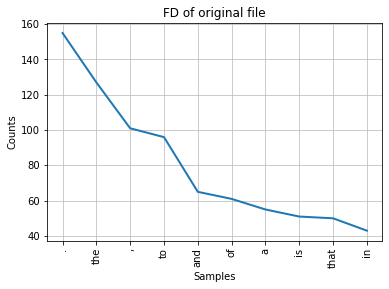

[('the', 150), ('to', 96), ('and', 67), ('of', 61), ('that', 55), ('it', 55), ('a', 55), ('is', 51), ('this', 46), ('in', 46), ('for', 43), ('games', 38), ('i', 36), ('be', 33), ('with', 29)]


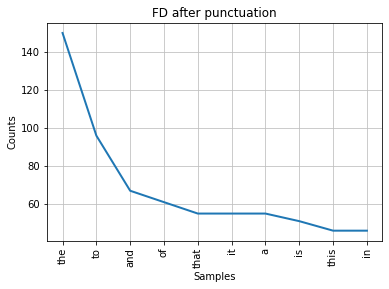

[('games', 38), ('game', 27), ('buy', 20), ('kids', 18), ('children', 17), ('like', 17), ('parents', 16), ('would', 15), ('law', 15), ('online', 15), ('people', 13), ('protection', 12), ('age', 12), ('lootboxes', 12), ('even', 11)]


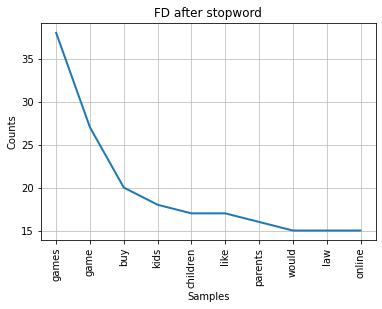

<AxesSubplot:title={'center':'FD after stopword'}, xlabel='Samples', ylabel='Counts'>

In [462]:
#calculating frequency distribution of top 15 words of original text
frequency_before = nltk.FreqDist(upvote_post_tokens)
print(frequency_before.most_common(15))
frequency_before.plot(10,title="FD of original file")

#calculating frequency distribution of top 15 words after removing punctuation and converting to lowercase 
frequency_after = nltk.FreqDist(upvote_punc)
print(frequency_after.most_common(15))
frequency_after.plot(10,title="FD after punctuation")

#calculating frequency distribution of top 15 words after removing stopwords
frequency_after = nltk.FreqDist(upvote_stop)
print(frequency_after.most_common(15))
frequency_after.plot(10,title="FD after stopword")
